# CHAPTER VI

# Solutions of Nonlinear Equations
&copy; Harishankar Manikantan, Chemical Engineering, UC Davis 

**[(6.1) Numerical Root Finding](#roots)**
*  [Exact and numerical roots](#exact) <br>
*  [Errors and tolerance](#error) <br>

**[(6.2) Nonlinear equations in one variable](#methods)**
*  [Bisection method](#bisection) <br>
*  [Regula falsi method](#falsi) <br>
*  [Newton's method](#Newton) <br>
*  [Halley's and higher-order methods](#householder) <br>

**[(6.3) More general root-finding](#general)**
* [Equations with multiple solutions](#multiple) <br>
* [Systems of nonlinear equations](#systems) <br>
* [Inbuilt Python routines](#inbuilt6) <br>


**[Practice problems](#exer)**



<a id='roots'></a>



## (6.1) Root finding

A linear equation in one variable is easily solved by rearrangement. For example, the equation $4x=16$ immediately tell us $x=4$. A nonlinear equation, on the other hand, is not as obvious. For example, the equation $4x^2=16$ tells us that $x=\sqrt{2}$. However, the notation $\sqrt{2}$ is just a convenient way to represent an irrational number that we know is something like $1.4142...$. Even so, most calculators can provide this information right away. How about a more complicated nonlinear equation like $x-\sin(x)=1$? There is no rearrangement or convenient representation for the $x$ that satisfies this equation.

Such nonlinear equations commonly arise in science and engineering, and the solution of such a problem is called the 'root' of the equation. This tutorial focuses on numerically determinging roots.


<a id='exact'></a>



### Exact and numerical roots

We know how to solve quadratic equations exactly: $ax^2+bx+c=0$ has roots $x=\left(-b\pm\sqrt{b^2-4ac}\right)/2a$. These are two _exact_ roots of the quadratic equation. This means that the solution is determined to any degree of accuracy given the constants $a$, $b$, and $c$. Similar (but much more unwieldy) formulas exist for cubic or quartic functions, but not beyond that. 

A _numerical_ root or solution, however, is not exact. It is only accurate to within a level of acceptable error. When an exact root is not easily available (or often not available at all), numerical solutions are handy ways to approximate the value. Irrational numbers, for example, are always numerically approximated. We might have convenient symbols for irrational numbers (e.g. $\pi$, $e$, $\sqrt{3}$, ...), but the actual value itself is approximated to some degree of accuracy by a calculator or computer when we use those number.

We will reduce every root-finding problem to the form $f(x)=0$. This reduces the problem to finding the 'zeros' of a function $f$. For example, in this notation, finding a numerical approximation to the square root of $2$ is the same as finding $x$ such that $x^2=2$. We will then rewrite this in a 'standard' functional form $f(x)=x^2-2$, so that the root correspondonds to $f(x)=0$. Using the same idea, we can see that the nonlinear equation $x-\sin(x)=1$ is solved by finding the zero of either function $f(x)=x-\sin(x)-1$ or $f(x)=1-x+\sin(x)$.

Then, we can roughly approximate a root by plotting this function. As the name suggests, the 'zero' of a function is the point where the plot crosses the x-axis. For example, plotting $f(x)=x^2-2$ gives:

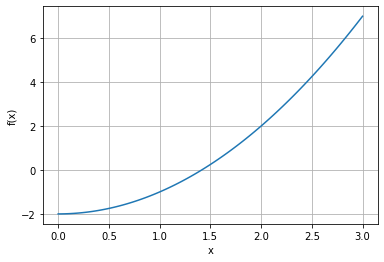

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,3,100)
f=x**2-2

plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

We have turned grid lines on to guide our eyes easily along the horizontal $f(x)=0$ line. We can tell that the root lies somewhere between 1 and 1.5. We can get a better estimate of the range by 'zooming in'. Try changing the linspace command to plot for 100 steps of x in this smaller range. Make this change above. Then try to 'zoom in' one or two more times to get a more and more accurate estimate.

Of course, we all know what $\sqrt{2}$ is (or can easily find this using `np.sqrt(2)`). But, the objective is to learn a general method that applied to any nonlinear equation. For example, use the above trick of 'zooming in' to to find an estimate for $x$ that satisfies $x-\sin(x)=1$. Try it in the code cell above.

What we have done above by 'zooming in' is essentially the underlying concept of all numerical root-finding algorithms. We will explore logical and efficient ways of doing this in the following sections. But first, we need to know how far we must zoom in. In other words, how much is good enough?

<a id='error'></a>



### Errors and tolerance

Numerical solutions are never _exact_. We can get closer and closer to an exact solution (if it exists) but there are always limitations to how close a computer can get. For example, we saw simply by plotting that $f(x)=x^2-2$ has a root close to $1.5$. Creating a single-line `lambda` function for $f(x)$ and evaluating $f(1.5)$ gives:

In [8]:
f=lambda x: x**2-2
f(1.5)

0.25

That's close to $0$ but not quite. With the 'zooming in' trick above, we could see that the zero is between $1.4$ and $1.42$. Trying one of these gives:

In [12]:
f(1.41)

-0.011900000000000244

The error is now negative, so we have 'overshot' our approximation. So we can find a closer approximation to the right of $1.41$. Try it. 

Obviously, every iteration gives a more accurate result. However, regardless of how many such iterations we perform, it is impossible in general to determine a root where $f(x)$ is absolutely zero. Thus, we have to select a desired level of accuracy when solving a problem numerically. There are many ways to quantify this:


#### True error

The true error is the difference between the true or exact solution, $x_{\rm TS}$, and the approximate numerical solution, $x_{\rm NS}$: 

$${\rm true~error} = x_{\rm TS}-x_{\rm NS}$$

Unfortunately, we often do no know what the true solution is, so the true error cannot always be determined.

#### Relative error

The relative error is the same as the true error, except expressed relative to the true value. Often, only the absolute value matters (how far are we, rather than in which direction):

$${\rm relative~error} = \left| \frac{x_{\rm TS}-x_{\rm NS}}{x_{\rm TS}} \right|$$

Again, this is not very helpful if we do not know the exact solution in advance. A common adaptation to make this work is to consider errors relative to numerical estimates from one iteration to another:

$${\rm estimated~relative~error} = \left| \frac{x^{(n)}_{\rm NS}-x^{(n-1)}_{\rm NS}}{x^{(n-1)}_{\rm TS}} \right|$$

Here $n$ is the _iteration number_. The idea then is that this estimated relative error must get smaller if we are getting closer and closer to the true solution (because steps we are taking are smaller and smaller). We could then prescribe a cut-off value of the estimated relative error which is sufficiently small. 

#### Tolerance

Instead of considering the error relative to the root (whose exact value we might not know in advance), we can calculate the error in the value of the function $f(x)$ because the exact value of this must be $0$. This is called the tolerance, and is typically defined with only the absolute value of the deviation from $0$:

$${\rm tolerance} = |f(x_{\rm TS})-f(x_{\rm NS})| = |0 -\epsilon|=|\epsilon|$$

We could then prescribe a tolerance level: a smaller tolerance would require many iterations but would provide a root that's closer to the exact solution.

In the following section, we will develop several methods to find roots of nonlinear equations. In each, we will control either the error (via the tolerance) or the number of iterations.

<a id='methods'></a>



## (6.2) Nonlinear equations in one variable


Algorithms to find nonlinear roots are either 'bracketed' or 'open'. Bracketed methods are useful when we know in advance that the root lies in the interval between two points. Open methods are useful when we only know one point near the actual root. The 'zooming in' trick we did above is precisely a bracketed method. The limits of the x-axis at each level of zoom (an iteration) are the brackets. Rather than pick new intervals randomly, the following methods set up a logical and algorthmic approach to zoom in on the root. Bisection and regular falsi are common bracketed methods:

<a id='bisection'></a>



### Bisection method

The bisection method works when we know that a continuous function $f(x)$ has one root in the interval $[a,b]$. The function must cross the x-axis at the root, and so $f(a)$ and $f(b)$ must have opposite signs. In other words, $f(a) \times f(b)$ is negative.

Let's work with the same example as before, using $f(x)=x^2-2$: 

In [13]:
f=lambda x: x**2-2

We know for a fact that there is a root between $x=0$ and $x=3$. So the first approximation to the root is simply the mid-point or the _bisection_ of these two points:

In [25]:
# interval
a=0
b=3

# first estimate for root
x_est=(a+b)/2
print(x_est)

1.5


For the next estimate, we need to 'zoom in' on either the interval $[a,x_{\rm est}]$ or the interval $[x_{\rm est},b]$, depending on where the root actually lies. However, we know that if a root is within an interval, the ends of the interval must be of the opposite sign as the function crosses the x-axis at the root. We can easily check which interval satisfies this condition by evaluating the product of the ends of each interval:

In [44]:
print(f(a)*f(x_est))
print(f(x_est)*f(b))

-1.3889770343666896e-05
2.4839435354806483e-05


Clearly, the root is in the first interval, between $a$ and $x_{\rm est}$. So let's perform a bisection in this new 'zoomed in' interval again. A convenient way to do this is to replace the 'old' $a$ and $b$ with the new values of the interval $a$ and $x_{\rm est}$ and repeat the same code as above:

In [45]:
# RIGHT sub-interval
# replace a and b to represent new interval
a=a
b=x_est

# second estimate for root, rewrite x_est
x_est=(a+b)/2
print(x_est)

1.41357421875


We can check which new sub-interval has a negative product of its limits. We can do this by running the same code cell as before. Turns out this time it is the second interval, the one between the new $x_{\rm est}$ and the new $b$. Replacing and repeating the bisection again gives:

In [43]:
# LEFT sub-interval
# replace a and b to repreesnt new interval
a=x_est
b=b

# second estimate for root, rewrite x_est
x_est=(a+b)/2
print(x_est)

1.4150390625


Check the product again. And then run the correct RIGHT or LEFT subinterval bisection again. And again. Each time, check the sign, and choose which subinterval is the one with the root. Does it look like we are getting close to the 'true' solution (which we know in this particular case is $\sqrt{2}=1.41421 \ldots)$

In fact, we can automate this process. The check for the sign of the interval limits can be coded in as an `if` condition as shown below. The following code runs for 10 such 'zooming' iterations:

In [1]:
# function
f=lambda x: x**2-2

# initial interval
a=0
b=3

for i in range(100):
    x_est=(a+b)/2
    
    if f(a)*f(x_est)<0: # check if root is in left sub-interval and replace b
        b=x_est
    else: # else root is in right sub-interval, so replace a
        a=x_est

print(x_est)

1.414213562373095


Changing the initial interval would change each step, so the solution after a certain number of steps will different. Obviosuly, choosing a smaller initial interval will get us closer to the true solution faster. Try a different initial value of $a$ and $b$ above. 

Similarly, for a given initial interval, running more iterations will get us closer to the true solution. Run the code above for 20 steps. What about 50 or a 100 steps. Are we close enough to the actual value of $\sqrt{2}$? Since we know the true solution in this case, we can find the true error:

In [57]:
np.sqrt(2)-x_est

2.220446049250313e-16

Another way to see how close we got is to actually evaluate $f(x)$ at the estimated numerical value of the root:

In [63]:
f(x_est)

-4.440892098500626e-16

You will notice that even after a 100 iterations (try a 1000...!), there is still some negligible numerical error that is beyond the machine's precision. This is why we can never find an _exact_ result numerically. We can only get infinitesimally close.

In reality, we often don't need accuracy to the 16th decimal place. Let's say that $f(x)$ being within a sixth decimal place of zero was good enough for us. We can rewrite the code above using the definition of the tolerance so that the loop stops (remember `break` statements to get out of loops...) when a prescribed tolerance is reached:

In [4]:
# function
f=lambda x: x**2-2

# initial interval
a=0
b=3

# prescribed or desired tolerance
tol=1e-6 # or 0.000001

for i in range(100):
    x_est=(a+b)/2    
    if f(a)*f(x_est)<0: # check if root is in left sub-interval and replace b
        b=x_est
    else: # else root is in right sub-interval, so replace b
        a=x_est
    
    # perform tolerance check
    if np.abs(f(x_est))<tol:
        break

print('The numerical solution is', x_est, 'after', i, 'iterations')

The numerical solution is 1.4142136573791504 after 20 iterations


Start with different initial interval values (as long as the root is within this interval) and see how many more or fewer iterations you need to get to within sixth decimal place accuracy. Change the tolerance and convince yourself that this code works the way you expect it to.

What do you expect to happen if the interval _does not_ contain the root? Try the initial interval $[2,3]$ above.

You might recall that `while` loops are better suited for when we do not know how many loops to run. So try rewriting the code above using a while loop.

Finally, package the code above as a function! The following python function takes the interval values, the tolerance, and the lambda function you defined for $f(x)$ as inputs, and return the numerical estimate. It's always a good practice to also build in an upper limit on the number of iterations (to prevent accidental 'infinite loops' if the interval provided does not contain the root).

In [137]:
# function bisection
# provide a function f, interval [a,b], a tolerance tol
# and a maximum number of iterations max_iter

# returns numerical estimate of root if the tolerance is reached within max_iter
# returns 'No solution after max_iter iterations' if tolerance is not reached

def bisection(f,a,b,tol,max_iter):
    for i in range(max_iter):
        x_est=(a+b)/2    
        if f(a)*f(x_est)<0: # check if root is in left sub-interval and replace b
            b=x_est
        else: # else root is in right sub-interval, so replace b
            a=x_est
    
        # perform tolerance check and break from loop if achieved
        if np.abs(f(x_est))<tol:
            break

    if i==max_iter-1: 
        print('No solution after %d iterations' %max_iter)
        return
    else:
        return x_est

Consider every line of the code above, make sure you understand the purpose of each line, and consider what modifications you could do. Try running the function for any $f(x)$ of your choice with a suitable interval range: 

In [141]:
f=lambda x: x**2-2
bisection(f,0,3,1e-6,100)

1.4142136573791504

Bisection methods always converges to an answer if a root (and only one root) exists in the initial interval $[a,b]$. For more complicated problems, a good choice of the interval might not be immediately obvious. A simple way to find this is to plot the function, and choose any interval that contains the point where the function crosses the x-axis!

<a id='falsi'></a>



### Regula falsi method

The regula falsi (for 'false position') method is an ancient (from the time of the ancient Babylonians) bracketed root-finding method by hand. Of course, modern computer have made it even easier. 

Unlike the simple bisection method, the regular falsi method picks a new point not at the mid-point of the current interval but at the point where a straight line passing though $f(a)$ and $f(b)$ meet the x-axis. For a given interval $[a,b]$, the equation of a straight line passing through $(a,f(a))$ and $(b,f(b))$ is 

$$ y=\frac{f(b)-f(a)}{b-a} (x-a) + f(a)$$

This line cuts the x-axis at $y=0$, and therefore rearranging gives

$$ x_{\rm est} =  \frac{a f(b)- b f(a)}{f(b) -f(a)}$$

The algorithm for finding the root then proceeds exactly like the bisection method: however, the new estimate at every iteration is found by the above expression instead of the mid-point of $a$ and $b$.

Adapt the function above to perform a regula falsi method for any input:

In [ ]:
# function regulafalsi
# provide a function f, interval [a,b], a tolerance tol
# and a maximum number of iterations max_iter

# returns numerical estimate of root if the tolerance is reached within max_iter
# returns 'No solution after max_iter iterations' if tolerance is not reached


One difference in the sequence of steps in this method is that the estimate always moves in one direction. Calculating a couple of steps by hand and drawing it out makes this clear. Could we somehow exploit this in making the code above a bit more efficient?

<a id='Newton'></a>

### Newton's method

The two methods above are bracketed, in that we need to know a lower and upper bound to the interval which contains the root. What if we did not have that information? Open root-finding methods only need one initial estimate that is close to the root. These methods are usually more efficient, but sometimes do not yield the solution as the estimate 'runs off' in the opposite direction as the actual root (... because we are not limited by an interval in the 'wrong' direction).

Newton's method or Newton-Raphson method is the simplest of a class of popular open root-finding algorithms that use information from the derivatives of the function $f(x)$. Newton's method starts at a point $x_0$ that is close to the root. The next estimate $x_1$ is then the point at which the tangent to the function at $(x_0,f(x_0))$ crosses the x-axis. Mathematically, the tangent has slope given by the derivate of $f(x)$:

$$ f'(x_0)= \frac{f(x_0)-0}{x_0-x_1} $$

Rearrangeing to find $x_1$ gives:

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$

And then, we can find the next estimate $x_2$ by repeating the process: find the slope at $x_1$ so that the tangent intersects the x-axis at $x_2$. And so on and on until at some iteration the estimate is within a prescribed tolerance. In general, the (n+1)th estimate follows from the n-th estimate as 

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

Let's first try this manually with the function $f(x)=x^2-2$ and its derivative $f'(x)=2x$. Define these functions first:

In [108]:
f = lambda x: x**2-2
fder = lambda x: 2*x

And let's start at $x_0=3$, which gives:

In [129]:
x_0=3
x_1=x_0-f(x_0)/fder(x_0)
print(x_1)

1.8333333333333333


Repeating the step to find $x_2$ gives:

In [130]:
x_2=x_1-f(x_1)/fder(x_1)
print(x_2)

1.4621212121212122


And two more times to get $x_3$ and then $x_4$:

In [131]:
x_3=x_2-f(x_2)/fder(x_2)
print(x_3)
x_4=x_3-f(x_3)/fder(x_3)
print(x_4)

1.4149984298948028
1.4142137800471977


You can compare this with the actual value of $\sqrt{2}$ and tell that we are within six decimal points of accuracy in just four steps! Newton's method, therefore, is very efficient provided a root exists and we start not too far from the root.

With this in mind, we can code up a Newton's method solver more generally:

In [7]:
# function Newton
# provide a function f, derivative fder, a starting point x_0
# a desired tolerance tol, and a maximum number of iterations max_iter

# returns numerical estimate of root if the tolerance is reached within max_iter
# returns 'No solution after max_iter iterations' if tolerance is not reached

def Newton(f,fder,x_0,tol,max_iter):
    
    x_est=x_0 # first estimate is the given point itself
    
    for i in range(max_iter):
        x_est-=f(x_est)/fder(x_est) 
        
        # perform tolerance check and break from loop if achieved
        if np.abs(f(x_est))<tol:
            break

    if i==max_iter-1: 
        print('No solution after %d iterations' %max_iter)
        return
    else:
        return x_est

Let's see how well this works in solving for the [Plastic number](https://en.wikipedia.org/wiki/Plastic_number), which is the root of the equation $x^3=x+1$, to 10 decimal place accuracy:

In [148]:
f = lambda x: x**3-x-1
fder = lambda x: 3*x**2-1

Newton(f,fder,3,1e-10,100)

1.324717957244746

Determine how many steps this took (you can modify the code to print how many iterations it took in general: return `i+1` along with `x_est`). Compare this with bisection or regula falsi: you should see that Newton's method is much more efficient in the sense that it gets to a more accurate solution in fewer steps.

<a id='householder'></a>

### Halley's and general derivative methods

Newton's method used information from not just the function $f(x)$, but also its derivative $f'(x)$ at each iteration. Somehow that made it must more efficient that other methods that used only functional values. A natural question then is: can we use higher derivatives somehow to get even faster and more efficient solutions?

Let's first re-derive Newton's method more systematically. A careful way to do this is by writing out the Taylor series expansion of the function $f(x)$ around the initial estimate $x_0$:

$$  f(x) = f(x_0) + (x-x_0) f'(x_0) + \frac{1}{2!} (x-x_0)^2 f''(x_0) + ... $$

and so on to an infinite number of terms. If a new estimate $x_1$ were the actual root, the we would have $f(x_1)=0$, so that 

$$  0 = f(x_0) + (x_1-x_0) f'(x_0) + \frac{1}{2!} (x_1-x_0)^2 f''(x_0) + ... $$

In principle, solving the above equation for $x_1$ will give us the exact root. If your starting point $x_0$ is close to $x_1$, we could neglect higher-order terms to get a good approximation of the root. Truncating after the first two terms and rearranging for $x_1$ then gives:

$$  0 \approx f(x_0) + (x_1-x_0) f'(x_0) \qquad \Rightarrow \qquad x_1 \approx x_0- \frac{f(x_0)}{f'(x_0)} $$

where the $\approx$ sign reminds us that $x_1$ is obtained by neglecting every term after the second in the Taylor series and so it not the exact root, but only an approximation. We could then repeat the process starting at $x_1$ to get closer to the actual root. And similarly again, starting at $x_n$ and estimating $x_{n+1}$ at each iteration. This is indeed Newton's method! 

So, could we do better if we neglect fewer terms in the Taylor expansion. Yes! Let's try incorporating one more term and rearranging like before so that 

$$ 0 \approx f(x_0) + (x_1-x_0) \left[ f'(x_0) + \frac{1}{2} (x_1-x_0) f''(x_0) \right] \qquad \Rightarrow \qquad x_1 \approx x_0- \frac{f(x_0)}{ f'(x_0) + \frac{1}{2} (x_1-x_0) f''(x_0)}  $$

This is not good because the RHS also contains the unknwon $x_1$. But, we can use the previous expression from Newton's method to subsitute for $x_1-x_0$ in the denominator in the RHS here. Doing this and simplifying (try this on paper) gives:

$$ x_1 \approx x_0- \frac{2 f(x_0) f'(x_0)}{ 2 f'(x_0)^2 - f(x_0)f''(x_0)}  $$

While this is better than Newton's method, it's still an approximation because we have neglected higher-order terms in the Taylor series. However, using this formula iteratively gets us much closer to the real root faster than Newton's method. 

This method was first proposed by the astronomer Edmond Halley (of the famous comet), and is therefore called Halley's method. You can also think of this as a "second-order" Newton's method. Write a code to create a solver that approximates roots using Halley's method. The code and the steps are similar: just use the more accurate second-order formula that we just derived above. As inputs, this code will need not just $f(x)$ and $f'(x)$, but also the second derivative $f''(x)$:

In [149]:
# Halley's method
# provide a function f, derivative fder, second derivate f2der, a starting point x_0
# a desired tolerance tol, and a maximum number of iterations max_iter

# returns numerical estimate of root if the tolerance is reached within max_iter
# returns 'No solution after max_iter iterations' if tolerance is not reached

Why stop at second order? Could we develop higher order and therefore more efficient root-finding methods. We certainly can, and this gives rise to a whole class of algorithms called [Householder's method](https://en.wikipedia.org/wiki/Householder%27s_method) by considering more terms in the series. If you are adventurous, try developing and coding up a third-order method. 

<a id='general'></a>



## (6.3) More general root-finding

So far, we looked at solving nonlinear equations of a single variable. But the same ideas apply to multiple coupled nonlinear equations. The math is a bit more cumbersome, but the code is still relatively straightforward once we have a mathematical formula for the iterations. Fortunately, python comes with packaged functions ready to use as well. So we will cover the mathematical and conceptual basics, and learn how to efficiently use python's inbuilt functions.


<a id='multiple'></a>



### Equations with multiple solutions

Many, if not most, nonlinear equations have multiple solutions. Even the simple problem we saw above, $x^2=2$ of equivalently $f(x)=x^2-2$ has two roots: $x=+\sqrt{2}$ and $x=-\sqrt{2}$. Again, this is obvious if we plot it in a wider range:

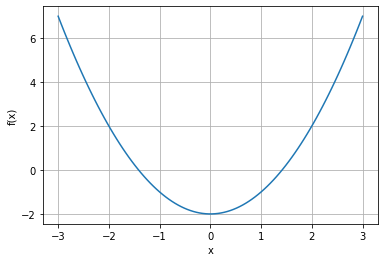

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-3,3,100)
f=x**2-2

plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

The curve crosses the x-axis at two locations. In the examples above, we always approached the positive root because we started near of within a bracket that contains $+\sqrt{2}$. We could easilty well have started closer to the negative root and any of our algorithms would converge to $-\sqrt{2}$. Try this (first run the code cells corresponding to bisection or Newton etc):

In [16]:
# alternative way to define function in single line

import numpy as np
def f(x): return x**2-2
def fder(x): return 2*x

print('Bisection method between -3 and 0 gives: %8.6f'%bisection(f,-3,0,1e-6,100))

print("Newton's method starting at -4 gives: %8.6f" %Newton(f,fder,-1,1e-6,100)) 
# notice use of double quotes when string itself has single quote

Bisection method between -3 and 0 gives: -1.414214
Newton's method starting at -4 gives: -1.414214


Try changing the function to something else: for example, the nonlinear function $\sin(x)$ has roots as $0$, $\pm \pi$, $\pm 2 \pi$, ... . Try changing the brackets or starting points to see how and to which root your root-finding algorithms converge.

Plotting an unknown function is always a good idea. Always plot first, get an estimate of approximately where it crosses the horizontal axis, then start your root-finding algorithm near or around it. Practice problem 5 illustrates a more systematic approach to writing a code that automatically scans for multiple roots.

 <a id='systems'></a>



### Systems of Nonlinear Equations

The same idea extends to multiple coupled nonlinear equations in several variables. We will work with Newton's method because concepts like Taylor series expansions are easy to extend to functions of multiple variables. 

Let's say we want to find the points of intersection of two circles given by 

$$ (x-3)^2+(y-4)^2 = 36 \qquad \text{and} \qquad (x+2)^2+(y-1)^2=9 $$

These are clearly nonlinear equations, and are both functions of two variables. The first step is to rewrite them in the 'standard' functional form $f=0$:

$$ f_1(x,y)=x^2 + y^2 -6x - 8y -11 = 0 \qquad \text{and} \qquad f_2(x,y)=x^2 + y^2 +4x -2y -4 = 0   $$

Like before, plotting is a good way to get initial estimates. These are functions in two variables, so we need a 2D plot, and the roots are the points where the two functions intersect each other. A good way to visualize this is to use pseudocolors or contours. The following code shows a simple visualization technique using `plt.contour`:

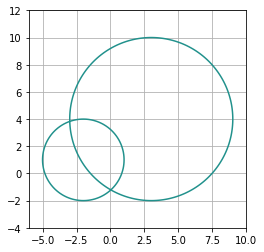

In [5]:
x=np.linspace(-6,10,100)
y=np.linspace(-4,10,100)

xgrid,ygrid=np.meshgrid(x,y)

f1=xgrid**2 + ygrid**2 -6*xgrid - 8*ygrid -11 
f2=xgrid**2 + ygrid**2 +4*xgrid - 2*ygrid -4

plt.contour(x,y,f1,0) # plot contour only at value of f1=0
plt.contour(x,y,f2,0) # plot contour only at value of f2=0
plt.axis('square')
plt.grid()
plt.show()

We can see that this system has two solutons where the curves intersect: roughly, they are near $(0,-1)$ and $(-3,4)$. We want to develop a numerical method that can do this more accurately.


The math is the same as the Taylor series development of Newton's method like before. Instead of a Taylor series in one variable, however, we will need multi-variable Taylor series expansions in two variables around some initial point $(x_0,y_0)$ for both the functions:

$$  f_1(x,y) = f_1(x_0,y_0) + (x-x_0) \left. \frac{\partial f_1}{\partial x} \right|_{x_0,y_0} + (y-y_0) \left. \frac{\partial f_1}{\partial y} \right|_{x_0,y_0}  + \ldots \\ 
f_2(x,y) = f_2(x_0,y_0) + (x-x_0) \left. \frac{\partial f_2}{\partial x} \right|_{x_0,y_0} + (y-y_0) \left. \frac{\partial f_2}{\partial y} \right|_{x_0,y_0}  + \ldots $$

Like before, if $(x,y)$ is close to $(x_0,y_0)$, we can safely truncate after the linear terms in the expansion and get a good approximation. So, a new estimate for the roots $(x_1,y_1)$ so that $f_1(x_1,y_1)=f_2(x_1,y_1)\approx 0$ requires:

$$  0 \approx f_1(x_0,y_0) + (x_1-x_0) \left. \frac{\partial f_1}{\partial x} \right|_{x_0,y_0} + (y_1-y_0) \left. \frac{\partial f_1}{\partial y} \right|_{x_0,y_0} \\ 
0 \approx f_2(x_0,y_0) + (x_1-x_0) \left. \frac{\partial f_2}{\partial x} \right|_{x_0,y_0} + (y_1-y_0) \left. \frac{\partial f_2}{\partial y} \right|_{x_0,y_0} $$

The functions and their derivative and their values at $(x_0,y_0)$ are all known, and so this is a system of two linear equations in two unknowns $(x_1,y_1)$. We can solve for them manually (work it out by hand: it is easier to treat it as a system in $x_1-x_0$ and $y_1-y_0$ ...) and we get:

$$ x_1 = x_0 + \frac{f_2(x_0,y_0)\left. \frac{\partial f_1}{\partial y} \right|_{x_0,y_0} - f_1(x_0,y_0) \left. \frac{\partial f_2}{\partial y} \right|_{x_0,y_0} } {\left. \frac{\partial f_1}{\partial x} \right|_{x_0,y_0}\left. \frac{\partial f_2}{\partial y} \right|_{x_0,y_0}-\left. \frac{\partial f_1}{\partial y} \right|_{x_0,y_0}\left. \frac{\partial f_2}{\partial x} \right|_{x_0,y_0}} \\
~\\
y_1 = y_0 + \frac{f_1(x_0,y_0)\left. \frac{\partial f_2}{\partial x} \right|_{x_0,y_0} - f_2(x_0,y_0) \left. \frac{\partial f_1}{\partial x} \right|_{x_0,y_0} } {\left. \frac{\partial f_1}{\partial x} \right|_{x_0,y_0}\left. \frac{\partial f_2}{\partial y} \right|_{x_0,y_0}-\left. \frac{\partial f_1}{\partial y} \right|_{x_0,y_0}\left. \frac{\partial f_2}{\partial x} \right|_{x_0,y_0}}
$$

This looks complicated but is simply the multi-variable analog of what we have done earlier. In fact, you might recognize from multi-variable calculus that the denominator is be the Jacobian determinant of the two functions evaluated at $(x_0,y_0)$:

$$ J(f_x,f_y) = det \begin{bmatrix} \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\ \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}\end{bmatrix} $$

Of course, this root is only an approximation. So, like with simple Newton's method, we do this process iteratively until a required tolearance is achieved. At each iteration the new estimates for $(x_{n+1},y_{n+1})$ are found by starting at the previous estimates at $(x_n,y_n)$. 

All this was the math. The code is pretty straightforward because we have the formula for each iteration. We will need the functions $f_1$ and $f_2$, as well as their derivatives with respect to $x$ and $y$ to set up this algorithm. The following code does this; compare each line with the corresponding single variable Newton code from before:

In [48]:
# function NewtonMult
# provide multi-variable functions f1, f2, derivatives f1dx, f1dy, f2dx, f2dy
# a starting point x_0, y_0
# a desired tolerance tol, and a maximum number of iterations max_iter

# returns numerical estimate of roots if the tolerance is reached within max_iter
# returns 'No solution after max_iter iterations' if tolerance is not reached

def NewtonMult(f1,f2,f1dx,f1dy,f2dx,f2dy,x_0,y_0,tol,max_iter):
    
    x_est=x_0 # first estimate is the given point itself
    y_est=y_0 # first estimate is the given point itself
    
    for i in range(max_iter):
        # calculate Jacobian
        Jac=f1dx(x_est,y_est)*f2dy(x_est,y_est)-f2dx(x_est,y_est)*f1dy(x_est,y_est)
        
        # calculate new estimates
        x_est+=(f2(x_est,y_est)*f1dy(x_est,y_est)-f1(x_est,y_est)*f2dy(x_est,y_est))/Jac
        y_est+=(f1(x_est,y_est)*f2dx(x_est,y_est)-f2(x_est,y_est)*f1dx(x_est,y_est))/Jac
        
        # perform tolerance check for BOTH FUNCTIONS and break from loop if achieved
        # use 'and' withinin if condition to check for both conditions
        if np.abs(f1(x_est,y_est))<tol and np.abs(f2(x_est,y_est))<tol:
            break

    if i==max_iter-1: 
        print('No solution after %d iterations' %max_iter)
        return
    else:
        return x_est,y_est

Then, the following code shows how we could find the two roots near $(0,-1)$ and $(-3,4)$ as informed by simply looking at approximate locations where the two curves intersect.

In [54]:
# function definitions
def f1(x,y): return x**2 + y**2 -6*x - 8*y -11 
def f2(x,y): return x**2 + y**2 +4*x - 2*y -4

# derivative definitions
def f1dx(x,y): return 2*x - 6
def f1dy(x,y): return 2*y - 8
def f2dx(x,y): return 2*x + 4
def f2dy(x,y): return 2*y - 2

# solve with tolerance 0.000001 and maximum 100 iterations

# first, the root near 
r_x1,r_y1 = NewtonMult(f1,f2,f1dx,f1dy,f2dx,f2dy,0,-1,1e-6,100)
print('First root is : %8.6f , %8.6f ' %(r_x1,r_y1)) # simultaneous formatting of output, optional

# then, the root near (-3,4)
r_x2,r_y2 = NewtonMult(f1,f2,f1dx,f1dy,f2dx,f2dy,-3,4,1e-6,100)
print('Second root is : %8.6f , %8.6f ' %(r_x2,r_y2)) # simultaneous formatting of output, optional

First root is : 0.026983 , -1.211638 
Second root is : -2.997571 , 3.829285 


Try changing the initial points to see which root your code converges to. Also change the function to return the number of iterations as well. You should see that the Newton's method (even for multi-variable functions) should converge rapidly. This function should only take under 10 steps to get to six decimal places of accuracy.

In principle, we can generalize this idea to systems of any number of nonlinear equations. In practice, the bookkeeping associated with such a method becomes cumbersome, and often inbuilt python routines are more convenient.

<a id='inbuilt6'></a>



### Inbuilt Python functions

By now, you have seen enough of Python to guess that there are inbuilt functions to do root-finding for you. Once you are comfortable with the conceptual framework and algorithms, and you know how the mathematical process works, you may freely use python's inbuilt root-solving function `fsolve`. This is within the module `scipy.optimize`. 

For a single-variable function $f(x)$, you can call `fsolve` using:

In [72]:
import scipy.optimize as so

def f(x): return x**2-2

# inbuilt function to find a root near 3
so.fsolve(f,3)

array([1.41421356])

`fsolve` automatically uses a tolerance of 10 decimal point accuracy, and controls for sufficient number of iteration. If you need explicit control over these things, you can provide them: look up the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) of `fsolve` for details. By default, `fsolve` uses Newton's method by esimating the derivative numerically (we will learn about numerical derivative estimates in the coming weeks).

You can even simultaneously find multiple roots if you provide multiple starting points as a list:

In [73]:
so.fsolve(f,[-3,3])

array([-1.41421356,  1.41421356])

And you can simultaneously solve sets of nonlinear equations in multiple variables as well. For this to work, the input argument to `fsolve` must be the name of a user-defiuned function that takes *only one* argument which is a list $[x,y]$ and returns the functional values as a list. The starting estimates are also provided as a list:

In [88]:
# here X is a list of the unknowns variable x,y
# so X[0] is x and X[1] is y
def myfuncs(X): return (X[0]**2 + X[1]**2 -6*X[0] - 8*X[1] -11,X[0]**2 + X[1]**2 +4*X[0] - 2*X[1] -4)

so.fsolve(myfuncs,(0,0))

array([ 0.02698263, -1.21163772])

Like before, try different initial guesses to see which root `fsolve` converges to.


<a id='exer'></a>



## Practice Problems

(1) Define appropriate $f(x)$ and use both Newton's method and `fsolve` to calculate:

(a) the cubic root of 10:

(b) $x$ such that $x=2e^{-x}$:

(c) $t$ such that $\sin(4t)+\cos(t)=t^2$:

(d) the natural logarithm of 100 without using `np.log`. Check your solution against `np.log(100)`.

Hint: if $x=\ln(N)$, then $N = e^x$, and then solve for $x$ ... 

(e) the intersection point of the parabolas $y=4x^2$ and $y^2=4x+2$. First plot the curves with grid lines on to determine if they intersect at all and make initial guesses for the root(s):

In [3]:
# plot first

In [1]:
# solve for roots

(2a) The van der Waal's equation is a nonlinear model that relates pressure, volume, and temperature of a gas:

$$ P = \frac{n R T}{V -nb} - \frac{n^2 a}{V^2} $$

Here, $P$ is in atmospheres, $V$ in liters, $T$ in Kelvin, $n$ is the number of moles, $R=0.09206 $ (L atm)/(mole K) is the gas constant, and $a$ (in L$^2$ atm / mole$^2$) and $b$ (in L/mole) are material constants.

Find the volume of a tank containing 2 moles of nitrogen ($a=1.39$ L$^2$ atm / mole$^2$ and $b=0.03913$ L/mole) at $25^\circ$C at a pressure of $10$ atm.

Use both your own Newton method (you will have to find the derivative of $P$ with respect to $V$ first for this) and python's inbuilt `fsolve`.

(2 b)  Next, write a code to loop through pressures from 1 to 300 atm and determine volume at each of these pressures at the same temperature. Plot the P vs. V diagram (with P in log axis) of nitrogen given this data. Plot the P vs. V corresponding to the ideal gas law ($PV=n R T$) for the same data as well. Are there any visible differences? 

*Hint: the van der Waals equation converges slowly at high pressures, so you might want to set the maximum number of iterations to 1000 or more ...*

(2 c) A common indicator of the 'non-ideality' of real gases is the [compressibility factor](https://en.wikipedia.org/wiki/Compressibility_factor) defined as $PV/nRT$. If the gas is ideal, then this ratio is one. Plot your solution for $PV/nRT$ corresponding to the van der Waals equation versus the pressure to see how close nitrogen is to ideal behavior. Compare your plot to the real data [here](https://en.wikipedia.org/wiki/Compressibility_factor#/media/File:N2_Compressibility_Factor_High_T.png).

(3) Projectile motion is a common topic in introductory physics classes. The [vertical displacement of a projectile](https://en.wikipedia.org/wiki/Projectile_motion#Displacement) thrown at velocity $v_0$ at an angle $\theta$ relative to the ground gets to a height $y$ after a horizontal displacement $x$ following the equation:

$$y = \tan (\theta) x - \frac{g x^2}{2 v_0 ^2 \cos^2(\theta)}$$

Here, $g=9.81~{\rm m/s^2}$ is acceleration due to gravity. Find the angle at which a ball must be thrown from ground level at a velocity of $20~{\rm m/s}$ so that it lands back at ground level exactly $60~{\rm m}$ away.

(4) Consider a low-key version of the game of [clay shooting](https://en.wikipedia.org/wiki/Clay_pigeon_shooting). In our very special and affordable version of this game, the player throws a projectile target following the equation in problem 3 above at an angle of $60^\circ$ at a velocity of $20~{\rm m/s}$. Immediately after that, the same player at the same place throws another projectile at an angle of $25^\circ$ at a velocity of $40~{\rm m/s}$. This would be the equivalent of shooting the target. Would the two trajectories meet (this would correspond to 'hittiing the target')? Plot to see if it does. If they do, at what position and vertical altitude does that happen?

(5) The objective of this problem is to find roots of the equation $\cos(2x)=\frac{1}{x}$. First, check by plotting $\cos(2x)$ and $\frac{1}{x}$ separately that the curves indeed intersect at multiple locations. In fact, they intersect at an infinite number of locations. Then, plot again in the 'standard' form of $f(x)= \ldots $ so that the roots correspond to the points where the function intersect the x-axis.

Recall that the initial guess matters if there are multiple roots. We would like to provide initial guesses near actual roots so our numerical methods would quickly converge to that. And the function changes sign every time it crosses the x-axis. So, write a loop in $x$ starting at $0$ increasing in small steps (e.g. $0.1$). At each increment, check if the function changes sign near the current $x$ (e.g. check if $f(x)$ and $f(x+0.1)$ at that point are of different signs). If it does, that means a root is nearby, and so run a Newton routine to find the root. 

Use this algorithm to determine all roots of the equation between $0$ and $10$. Plot the function to see if your roots are near where you expect them to be.